In [1]:
! pip install scipy==1.7.3
# ! pip show scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 347 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats

## **Initial data. Three samples and parameters**
$$ \alpha = 2, \quad \sigma^{2} = 0.9, \quad \varepsilon = 0.19 $$

In [3]:
alpha = 2
coeff_norm = 0.9
epsilon = 0.19

subsample1 = np.array([2.976, 1.018, 3.113, 0.247, 2.716, 3.564, 1.171, 1.726, 3.200, 1.922, 
                        2.848, 2.305, 0.730, 1.024, 2.803, 2.805, 1.056, 1.279, 4.733, 1.583])

subsample2 = np.array([2.126, 0.224, 2.477, 1.926, 3.527, 1.965, 1.785, 2.601, 2.385, 2.396,
                         2.658, 1.965, 1.987, 3.158, 0.987, 2.072, 2.331, 0.967, 2.114, 3.744,
                         2.185, 2.804, 2.340, 0.407, 2.372, 3.331, 3.309, 0.278, 2.480, 3.779])

sample1 = np.concatenate((subsample1, subsample2))

sample2 = np.array([0.198, 0.684, 0.259, 0.729, 0.608, 0.753, 0.898, 0.436, 0.964, 0.883,
                   0.527, 0.614, 0.660, 0.580, 0.098, 0.845, 0.473, 0.830, 0.783, 0.975,
                   0.300, 0.223, 0.795, 0.140, 0.992, 0.550, 0.568, 0.643, 0.386, 0.428])

### **Task 1:**
1) Построить точные доверительные интервали с уровнями доверия: $\quad 0.99, 0.95, 0.9 $

*N.B.* Считать, что выборка из нормального распределения с параметрами $ \quad \alpha, \sigma^{2}$


*   Для $\alpha$ , если $\sigma^{2}$ известно
*   Для $\alpha$ , если $\sigma^{2}$ неизвестно
*   Для $\sigma^{2}$, если $\alpha$ известно
*   Для $\sigma^{2}$, если $\alpha$ неизвестно




Границы доверительных интервалов для заданий выше
*   $$ (\overline{X} -\sigma \frac{\tau_{1-\frac{ɛ}{2}}}{\sqrt{n}}, \overline{X} +\sigma \frac{\tau_{1-\frac{ɛ}{2}}}{\sqrt{n}}) $$

*   $$ (\overline{X} -\frac{ S^{2}_{0} t_{n-1, 1-\frac{ɛ}{2}}}{\sqrt{n}}, \overline{X} + \frac{S^{2}_{0} t_{n-1, 1-\frac{ɛ}{2}}}{\sqrt{n}}) \quad  , where\ S_{0}^{2} = \sum_{i=1}^{i=n} {\frac{(X_{i}-\overline{X})^{2}}{n-1}}$$

* $$ (\frac{n S^{2}_{1} }{g_{n,1-\frac{ɛ}{2}}}, \frac{n S^{2}_{1} }{g_{n,\frac{ɛ}{2}}}) \quad  , where\ S_{1}^{2} = \sum_{i=1}^{i=n} {\frac{(X_{i} - \alpha) ^{2}}{n}} $$

* $$ (\frac{(n-1) S^{2}_{0} }{g_{n-1,1-\frac{ɛ}{2}}}, \frac{(n-1) S^{2}_{0} }{g_{n-1,\frac{ɛ}{2}}}) \quad  , where\ S_{0}^{2} = \sum_{i=1}^{i=n} {\frac{(X_{i}-\overline{X})^{2}}{n-1}} $$

---



In [18]:
def sample_mean(sample):
  return sum(sample)/len(sample)

def sample_variance(sample, mean_approx=True, bias=False):
  mean = alpha if not mean_approx else sample_mean(sample)
  s = 0
  denom = len(sample) if bias else len(sample)-1
  for x in sample:
    s += (x-mean)**2
  return s/denom

1.0228567546938778


- Для $\alpha$ , если $\sigma^{2}$ известно



In [5]:
# for epsilon = 0.01
alpha_left = sample_mean(sample1) - (math.sqrt(coeff_norm)*2.576)/(math.sqrt(len(sample1)))
alpha_right = sample_mean(sample1) + (math.sqrt(coeff_norm)*2.576)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.99: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.05
alpha_left = sample_mean(sample1) - (math.sqrt(coeff_norm)*1.960)/(math.sqrt(len(sample1)))
alpha_right = sample_mean(sample1) + (math.sqrt(coeff_norm)*1.960)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.95: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.1
alpha_left = sample_mean(sample1) - (math.sqrt(coeff_norm)*1.645)/(math.sqrt(len(sample1)))
alpha_right = sample_mean(sample1) + (math.sqrt(coeff_norm)*1.645)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.9: ({alpha_left:.3f}, {alpha_right:.3f})')

Доверительный интервал с уровнем доверия 0.99: (1.844, 2.536)
Доверительный интервал с уровнем доверия 0.95: (1.927, 2.453)
Доверительный интервал с уровнем доверия 0.9: (1.969, 2.411)


*   Для $\alpha$ , если $\sigma^{2}$ неизвестно

In [6]:
mean = sample_mean(sample1)
var = sample_variance(sample1, mean_approx=True, bias=False)

# for epsilon = 0.01
alpha_left = mean - (math.sqrt(var)*2.405)/(math.sqrt(len(sample1)))
alpha_right = mean + (math.sqrt(var)*2.405)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.99: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.05
alpha_left = mean - (math.sqrt(var)*2.010)/(math.sqrt(len(sample1)))
alpha_right = mean + (math.sqrt(var)*2.010)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.95: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.1
alpha_left = mean - (math.sqrt(var)*1.677)/(math.sqrt(len(sample1)))
alpha_right = mean + (math.sqrt(var)*1.677)/(math.sqrt(len(sample1)))
print(f'Доверительный интервал с уровнем доверия 0.9: ({alpha_left:.3f}, {alpha_right:.3f})')

Доверительный интервал с уровнем доверия 0.99: (1.846, 2.534)
Доверительный интервал с уровнем доверия 0.95: (1.902, 2.477)
Доверительный интервал с уровнем доверия 0.9: (1.950, 2.430)


*   Для $\sigma^{2}$, если $\alpha$ известно

In [7]:
mean = sample_mean(sample1)
var = sample_variance(sample1, mean_approx=False, bias=True)

# for epsilon = 0.01
alpha_left = len(sample1)*var/79.590
alpha_right = len(sample1)*var/27.991
print(f'Доверительный интервал с уровнем доверия 0.99: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.5
alpha_left = len(sample1)*var/71.420
alpha_right = len(sample1)*var/32.357
print(f'Доверительный интервал с уровнем доверия 0.95: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.1
alpha_left = len(sample1)*var/67.505
alpha_right = len(sample1)*var/34.764
print(f'Доверительный интервал с уровнем доверия 0.9: ({alpha_left:.3f}, {alpha_right:.3f})')

Доверительный интервал с уровнем доверия 0.99: (0.652, 1.855)
Доверительный интервал с уровнем доверия 0.95: (0.727, 1.605)
Доверительный интервал с уровнем доверия 0.9: (0.769, 1.494)


*   Для $\sigma^{2}$, если $\alpha$ неизвестно

In [8]:
mean = sample_mean(sample1)
var = sample_variance(sample1, mean_approx=True, bias=False)

# for epsilon = 0.01
alpha_left = (len(sample1)-1)*var/78.231
alpha_right = (len(sample1)-1)*var/27.249
print(f'Доверительный интервал с уровнем доверия 0.99: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.05
alpha_left = (len(sample1)-1)*var/70.222
alpha_right = (len(sample1)-1)*var/31.555
print(f'Доверительный интервал с уровнем доверия 0.95: ({alpha_left:.3f}, {alpha_right:.3f})')

# for epsilon = 0.1
alpha_left = (len(sample1)-1)*var/66.339
alpha_right = (len(sample1)-1)*var/33.930
print(f'Доверительный интервал с уровнем доверия 0.9: ({alpha_left:.3f}, {alpha_right:.3f})')

Доверительный интервал с уровнем доверия 0.99: (0.641, 1.839)
Доверительный интервал с уровнем доверия 0.95: (0.714, 1.588)
Доверительный интервал с уровнем доверия 0.9: (0.756, 1.477)


### **Task 2:**
По числововой выборке sample2

a) Построить график эмпирической функции распределения и гистограмму с помощью формулы Стерджесса.

b) Проверить основную гипотезу о равномерности распределения с помощью критерия Колмогорова

c) Проверить основную гипотезу о равномерности распределения с помощью критерия $ \chi^{2}$

In [22]:
def empirical_cdf(series, y):
  return np.count_nonzero(series < y)/len(series)

# distribution function for uniform
def cdf(y):
  if y >= 0 and y <= 1: 
    return y
  elif y <= 0:
    return 0
  else:
    return 1

def pdf(y):
  if y >= 0 and y <= 1:
    return 1
  else:
    return 0



0.0




*   *Empirical distribution function*



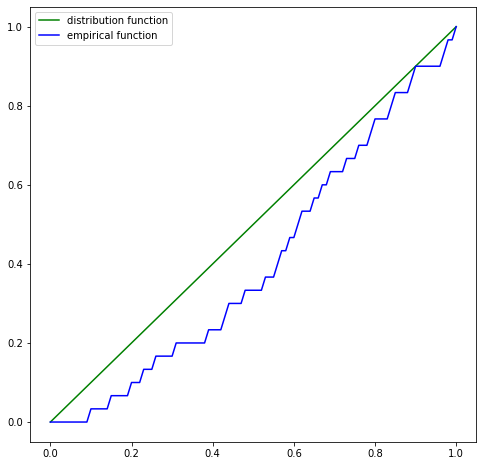

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
x = [i/100 for i in range(0,101)]
ax.plot(x, [cdf(t) for t in x], color='green', label ='distribution function')
ax.plot(x, [empirical_cdf(sample2,t) for t in x], color='blue', label='empirical function')
plt.legend()



*   *Hystogram*


No handles with labels found to put in legend.


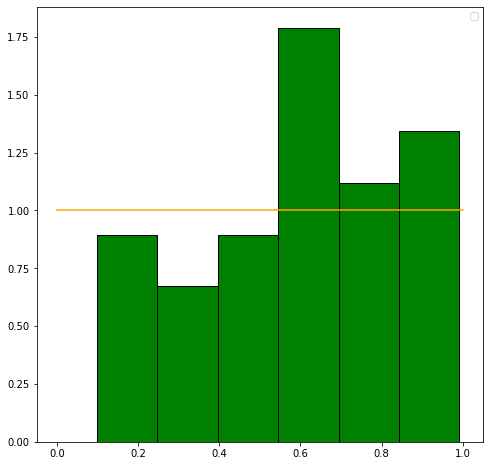

In [11]:
# define optimal number of intervals
n_intervals = 1 + round(math.log(len(sample2), 2))

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(x, [pdf(y) for y in x], color='orange')
ax.hist(sample2, n_intervals, color='green', histtype='bar', ec='black', density=True)
ax.legend()



*   Проверка критерия Колмогорова



Пусть имеется выборка  $\vec{X}=(X_{1}, ..., X_{n}) $  Положим 
$$ \rho(\vec{X}) = \sqrt{n}\sup_{y}|F_{n}^{*}(y)-F_{1}(y)|$$

Сам критерий имеет вид:
$$   \begin{equation}
   \delta(\vec{X}) =
    \begin{cases}
      H_{1} & \text{if $ \rho(\vec{X}) < C$}\\
      H_{2} & \text{if $ \rho(\vec{X}) \ge C$}\\
    \end{cases}       
\end{equation}
$$
Причем константа $C$ вычисляется из условия $\quad \varepsilon = P(\eta \ge C)$

In [12]:
n = len(sample2)
var_series = sorted(sample2)
# for points, where max was reached
idx_right = 0
idx_left = 0

D_right = 0
D_left = 0
# find idxs and values for maximization of 
for i in range(n):
  D_right = D_right if D_right > ((i+1)/n - cdf(var_series[i])) else ((i+1)/n - cdf(var_series[i]))
  idx_right = idx_right if D_right != ((i+1)/n - cdf(var_series[i])) else i
  
  D_left = D_left if D_left > (cdf(var_series[i]) - i/n) else (cdf(var_series[i]) - i/n)
  idx_left = idx_left if D_left != (cdf(var_series[i]) - i/n) else i

D = max([D_left, D_right])
idx_max = idx_right if D_right > D_left else idx_left
print(f'Sup of abs of difference: {D:.3f}, arg: {var_series[idx_max]:.3f}')

# results of Kstest
rho = math.sqrt(n)*D
# for c: http://smc.edu.nstu.ru/krit_kolm.htm
c = 1.09
print(f"Results of kstest: {rho:.3f} < {c}")
print("Принимается основная гипотеза о том, что исходная выборка из равномерного распределения")

Sup of abs of difference: 0.195, arg: 0.428
Results of kstest: 1.066 < 1.09
Принимается основная гипотеза о том, что исходная выборка из равномерного распределения


In [13]:
print(f"Sup: {stats.kstest(sample2, 'uniform')[0]:.3f}, p-value: {stats.kstest(sample2, 'uniform')[1]:.3f}")

Sup: 0.195, p-value: 0.180






*   Критерий $\chi^{2}$






Статистика для критерия вычисляется следующим образом:

$$ \rho(\vec{X}) = \sum_{k=1}^{n\_intervals}{\frac{(n_{i}-np_{j})^{2}}{np_{j}}} $$
По теореме Пирсона, если верна гипотеза $H_{1}$, то при фиксированном числе интервалов исходная статистика слабо сходится к с.в. с распределением 
$\quad \chi^{2}_{n\_intervals-1}$

Где  
$ n $ - объем выборки  
$ n_{j} $ - число элементов $j$ - ой категории  
$ p_{j} $ - вероятность принадлежности к j-ой категории (теоретическая)

Сам критерий имеет вид:
$$   \begin{equation}
   \delta(\vec{X}) =
    \begin{cases}
      H_{1} & \text{if $ \rho(\vec{X}) < C$}\\
      H_{2} & \text{if $ \rho(\vec{X}) \ge C$}\\
    \end{cases}       
\end{equation}
$$
Где $C$ вычисляется аналогично критерию Колмогорова (но с другой функцией распределения) $\quad P(\eta \ge C) = ɛ$

In [14]:
p1 = 1/n_intervals
statistic = 0
categories = []
for i in range(n_intervals):
  l = np.count_nonzero(sample2 > (i+1)/n_intervals)
  r = np.count_nonzero(sample2 < i/n_intervals)
  res = n-(l+r)
  categories.append(res)
  statistic += (res-n*p1)**2/(n*p1)

print(f"Chi-square statistics: {statistic:.3f}")
# check Pirson criterion proof to clarify why we have k-1 degrees of freedom
# print(f"p-value: {stats.chi2.sf(statistic, n_intervals-1):.3f}\n")

# Shi-squared test
print(f"Results of chi-squared test: {statistic:.3f} < {stats.chi2.isf(epsilon, n_intervals-1):.3f}")
print("Т.е. мы принимаем первую гипотезу о принадлежности к равномерному распределению")

Chi-square statistics: 4.400
Results of chi-squared test: 4.400 < 7.439
Т.е. мы принимаем первую гипотезу о принадлежности к равномерному распределению


In [15]:
# stats.chisquare(lt)

### **Task 3:**
По данным двум выборкам из sample1 проверить гипотезы:

a) О совпадении дисперсий
Для этой цели воспользуемся критерием Фишера.
$$ \rho(\vec{X}) = \frac{S^{2}_{0}(\vec{X})}{S^{2}_{0}(\vec{Y})} $$

$$   \begin{equation}
   \delta(\vec{X}) =
    \begin{cases}
      H_{1} & \text{if $ \rho(\vec{X}) < f_{1-ɛ}$}\\
      H_{2} & \text{if $ \rho(\vec{X}) \ge f_{1-ɛ}$}\\
    \end{cases}       
\end{equation}
$$

b) О совпадении средних, если известно, что дисперсии совпадают

In [24]:
var1 = sample_variance(subsample1, mean_approx=True, bias=True)
var2 = sample_variance(subsample2, mean_approx=True, bias=True)

mean1 = sample_mean(subsample1)
mean2 = sample_mean(subsample2)

n1 = len(subsample1)
n2 = len(subsample2)

# a)
fish = sample_variance(subsample1, mean_approx=True, bias=False)/sample_variance(subsample2, mean_approx=True, bias=False)
# n1-1, n2-1 degrees of freedom
# print(f"Results of Fisher's test: {stats.f.ppf(epsilon/2, n1-1, n2-1)} < {fish} < {stats.f.ppf(1-epsilon/2, n1-1, n2-1)}")
print(f"Results of Fisher's test: {stats.f.ppf(epsilon/2, n1-1, n2-1)} < {fish} < {stats.f.ppf(1-epsilon/2, n1-1, n2-1)}")
print("Hence, our variances are equal!\n")

# b)
t = ( math.fabs(mean1 - mean2)/math.sqrt(n1*var1 + n2*var2) )*math.sqrt((n1+n2-2)/(1/n1 + 1/n2))
print(f"Results of Student's test: {t} < {stats.t.ppf(1-epsilon/2, n1+n2-2)}")
print("Hence, our means are equal!")

1.301215102631579
0.8729918160919539
Results of Fisher's test: 0.5598471411863282 < 1.4905238269662309 < 1.705258804444098
Hence, our variances are equal!

Results of Student's test: 0.2772451047455258 < 1.3294000557039296
Hence, our means are equal!
